# MD004 ENTREGA5 ANOVA

### <font color='#3d59c6'> PARTE I </font>

**Imagina que te llega un conjunto de datos que contiene tres variables categóricas>> A,B y C (con 2 categorías cada una). ¿Podrías plantear una estrategia que recoja los 3 factores realizando un Two-Way ANOVA? ¿y un One-Way ANOVA? ¿Qué consideraciones tendrías en cuenta al diseñar estos análisis? (2pt)**

Primero, suponemos que el dataset contiene alguna variable dependiente continua, es decir, no sólo hay factores. De ser así, podemos hacer lo siguiente (considerando una variable continua única):

- **Two-way ANOVA:**

Podriamos platear un Two-way ANOVA con intersecciones, es decir, considerar A con B ; A con C y B con C. Con los resultados, podemos examina las interacciones significativas para entender cómo los efectos de una variable pueden depender de la presencia de otra.

- **One-way ANOVA:**

Para el one-way anova, podemos realizar uno para cada variable categórica (A, B, y C).

Así, tendremos una idea de la influencia de cada factor a la variable dependiente continua escogida.

Como consideraciones generales, antes de realizar los estudios (one-way o two-way), hemos de asegurar que cumplimos con los supuestos:

- Normalidad
- Homocedasticidad

También podriamos explorar la presenica de outliers, para asegurar que el resultado no se ve sesgado por errores en nuestros datos.


### <font color='#3d59c6'> PARTE II </font>

Se dispone del siguiente dataset que contiene en formato csv registros de diferentes deportistas y donde se recoge el valor de las siguientes variables teniendo como factores deporte y género:

- rcc: glóbulos rojos
- wcc: células blancas en la sangre
- hc: hematocritos(%)
- hg: concentración de hemoglobina, en gr por decalitro
- bmi: indice masa corporal
- sex: 2 categorías >> f m
- sport: 9 categorías >> B_Ball Netball Row Swim T_400m T_Sprnt Tennis W_Polo


###### Data: 
202401_ais.csv

(selección de >> origen:https://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)




# 1. Visualización y comprensión del dataset (2p)

## <font color='#3d59c6'>  1.1 CARGA DE PACKAGES </font>

In [20]:
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(corrplot)

corrplot 0.84 loaded


## <font color='#3d59c6'>  1.2 CARGA DE DATOS </font>

In [3]:
data_ais = read.csv(file='202401_ais.csv', header=TRUE, sep=';', dec='.')
head(data_ais)
tail(data_ais)

rownames,rcc,wcc,hc,hg,bmi,sex,sport
1,3.96,7.5,37.5,12.3,20.56,f,B_Ball
2,4.41,8.3,38.2,12.7,20.67,f,B_Ball
3,4.14,5.0,36.4,11.6,21.86,f,B_Ball
4,4.11,5.3,37.3,12.6,21.88,f,B_Ball
5,4.45,6.8,41.5,14.0,18.96,f,B_Ball
6,4.10,4.4,37.4,12.5,21.04,f,B_Ball


,rownames,rcc,wcc,hc,hg,bmi,sex,sport
119,173,5.49,5.9,47.7,15.9,22.28,m,T_400m
120,175,5.03,6.6,44.7,15.9,19.85,m,T_400m
121,199,5.66,8.3,50.2,17.7,23.76,m,Tennis
122,200,5.03,6.4,42.7,14.3,22.01,m,Tennis
123,201,4.97,8.8,43.0,14.9,22.34,m,Tennis
124,202,5.38,6.3,46.0,15.7,21.07,m,Tennis


Una vez cargado el dataset y gracias a las funciones **head()** y **tail()** podemos visualizar los datos, para tener un primer contacto más limpio con estos. En este caso podemos ver como tenemos pocas instancias en dicho dataset, dado las analisis que queremos hacer. Más adelatne veremos que posibles implicaciones pude tener esa, a priori, falta de información

## <font color='#3d59c6'>  1.3. VISUALIZACIÓN Y COMPRENSIÓN DEL DATASET </font>

In [4]:
str(data_ais)
dim(data_ais)

is.null(data_ais)

any(duplicated(data_ais))

'data.frame':	124 obs. of  8 variables:
 $ rownames: int  1 2 3 4 5 6 7 8 9 10 ...
 $ rcc     : num  3.96 4.41 4.14 4.11 4.45 4.1 4.31 4.42 4.3 4.51 ...
 $ wcc     : num  7.5 8.3 5 5.3 6.8 4.4 5.3 5.7 8.9 4.4 ...
 $ hc      : num  37.5 38.2 36.4 37.3 41.5 37.4 39.6 39.9 41.1 41.6 ...
 $ hg      : num  12.3 12.7 11.6 12.6 14 12.5 12.8 13.2 13.5 12.7 ...
 $ bmi     : num  20.6 20.7 21.9 21.9 19 ...
 $ sex     : Factor w/ 2 levels "f","m": 1 1 1 1 1 1 1 1 1 1 ...
 $ sport   : Factor w/ 5 levels "B_Ball","Row",..: 1 1 1 1 1 1 1 1 1 1 ...


[1] 124   8

[1] FALSE

[1] FALSE

Entrando más en detalle, vemos como, efectivamente, contamos con pocas observaciones (**124**), con **8** variables, 6 continuas y 2 categóricas.

Además, no tenemos nulls ni instancias repetidas, cosa que indica, a priori, un dataset limpio. Aún así, vamos a seguir investigando los datos para asegurar dicha afirmación

### <font color='#3d59c6'>  1.3.1 Variables numéricas </font>

In [5]:
data_ais_numericas = data_ais %>%
  select_if(is.numeric)

data_ais_numericas <- data_ais_numericas[-1]

head(data_ais_numericas)
summary(data_ais_numericas)


rcc,wcc,hc,hg,bmi
3.96,7.5,37.5,12.3,20.56
4.41,8.3,38.2,12.7,20.67
4.14,5.0,36.4,11.6,21.86
4.11,5.3,37.3,12.6,21.88
4.45,6.8,41.5,14.0,18.96
4.10,4.4,37.4,12.5,21.04


      rcc             wcc               hc              hg       
 Min.   :3.900   Min.   : 3.300   Min.   :36.40   Min.   :11.60  
 1st Qu.:4.360   1st Qu.: 5.800   1st Qu.:40.98   1st Qu.:13.78  
 Median :4.695   Median : 6.600   Median :43.15   Median :14.60  
 Mean   :4.676   Mean   : 6.613   Mean   :43.00   Mean   :14.52  
 3rd Qu.:5.005   3rd Qu.: 7.500   3rd Qu.:45.23   3rd Qu.:15.40  
 Max.   :5.660   Max.   :10.100   Max.   :50.20   Max.   :17.70  
      bmi       
 Min.   :16.75  
 1st Qu.:20.80  
 Median :22.33  
 Mean   :22.29  
 3rd Qu.:23.73  
 Max.   :26.79  

In [38]:
data_ais_numericas %>% 
    summarize(m_rcc = mean(rcc), sd_rcc = sd(rcc) 
             , m_wcc= mean(wcc), sd_wcc = sd(wcc)
             , m_hg = mean(hg), sd_hg = sd(hg),
             m_hc = mean(hc), sd_hc = sd(hc)
             , m_bmi = mean(bmi), sd_bmi = sd(bmi))

m_rcc,sd_rcc,m_wcc,sd_wcc,m_hg,sd_hg,m_hc,sd_hc,m_bmi,sd_bmi
4.675726,0.4095728,6.612903,1.385697,14.51532,1.201019,42.99597,3.06253,22.29234,2.108925


Empezando con las continuas, observamos como, en general, se trata de un dataset poco disperso, es decir, a priori nuestras variables seguiran una normal (mas adelante lo graficaremos para comprovar). 

Dado el poco conocimient del dominio, sacar conclusiones prematuras sobre las variables resulta difícil. Aún asi, podemos ver como el bmi (índice de masa corporal) es ciretamente elevado, rozando lo que se considera sobrepeso. Dicho dato puede tener sentido, ya que al tratarse de deportistas, sumado a que los deportes presentes requieren de fuerza física, dichos individuos pueden estar en un superhabit calórico, debido al gran esfuerzo que sus disciplinas requieren. Dicha métrica nos puede ser útil para determinar nuestros factores.

In [42]:
data_ais_summary = data_ais %>%
  group_by(sex) %>%
      summarize(
        m_rcc = mean(rcc), sd_rcc = sd(rcc) 
        , m_wcc= mean(wcc), sd_wcc = sd(wcc)
        , m_hg = mean(hg), sd_hg = sd(hg)
        , m_hc = mean(hc), sd_hc = sd(hc)
        , m_bmi = mean(bmi), sd_bmi = sd(bmi))

diff_row = data_ais_summary %>%
  summarise(sex = "diff_sex",
        m_rcc = diff(m_rcc),sd_rcc = diff(sd_rcc),
        m_wcc = diff(m_wcc),sd_wcc = diff(sd_wcc),
        m_hg = diff(m_hg),sd_hg = diff(sd_hg),
        m_hc = diff(m_hc), sd_hc = diff(sd_hc) , 
        m_bmi = diff(m_bmi),sd_bmi = diff(sd_bmi))

data_ais_summary = bind_rows(data_ais_summary, diff_row)
data_ais_summary

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

sex,m_rcc,sd_rcc,m_wcc,sd_wcc,m_hg,sd_hg,m_hc,sd_hc,m_bmi,sd_bmi
f,4.4040323,0.30030836,6.5403226,1.35809168,13.672581,0.89078513,40.92097,2.3966600,21.589516,2.0627480
m,4.9474194,0.31306489,6.6854839,1.42009545,15.358065,0.81934568,45.07097,2.1013179,22.995161,1.9258754
diff_sex,0.5433871,0.01275652,0.1451613,0.06200377,1.685484,-0.07143945,4.15000,-0.2953422,1.405645,-0.1368726


De hecho, si miramos las diferencias por sexo, podemos ver como son, a rasgos generales, bastante similares entre sexo. Esto nos puede resultar un problema, ya que podemos intuir que entonces dichas variables no tendrán significancia estadística para describir el factor sexo.

Aún así, **hc/hg/bmi** son variables a considerar para diferenciar entre sexo

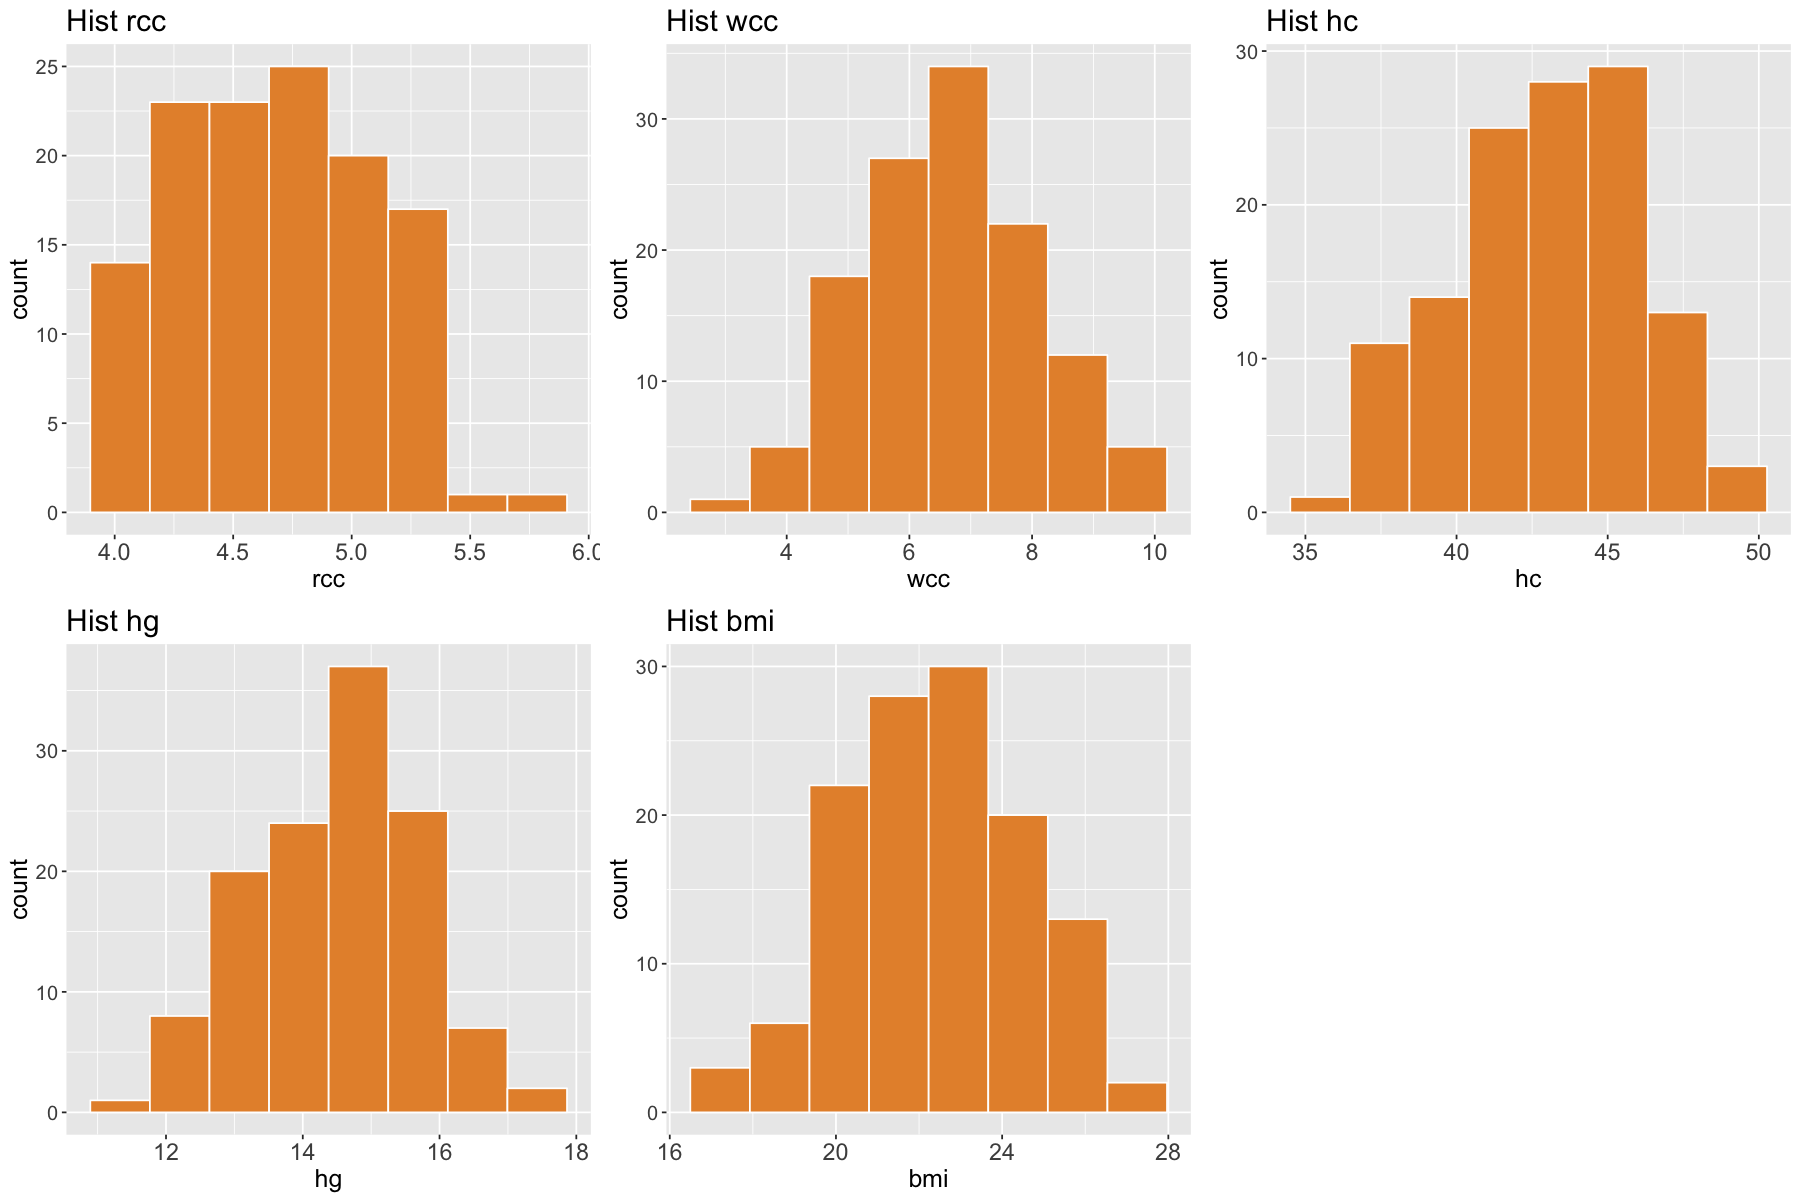

In [8]:
graficos_histograma = list()
var_data = colnames(data_ais_numericas)

for (variable in var_data) {

  grafico = ggplot(data_ais_numericas) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#e69138', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste('Hist', variable))
  

  graficos_histograma[[length(graficos_histograma) + 1]] = grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10  
)

do.call('grid.arrange', c(graficos_histograma, ncol = 3))

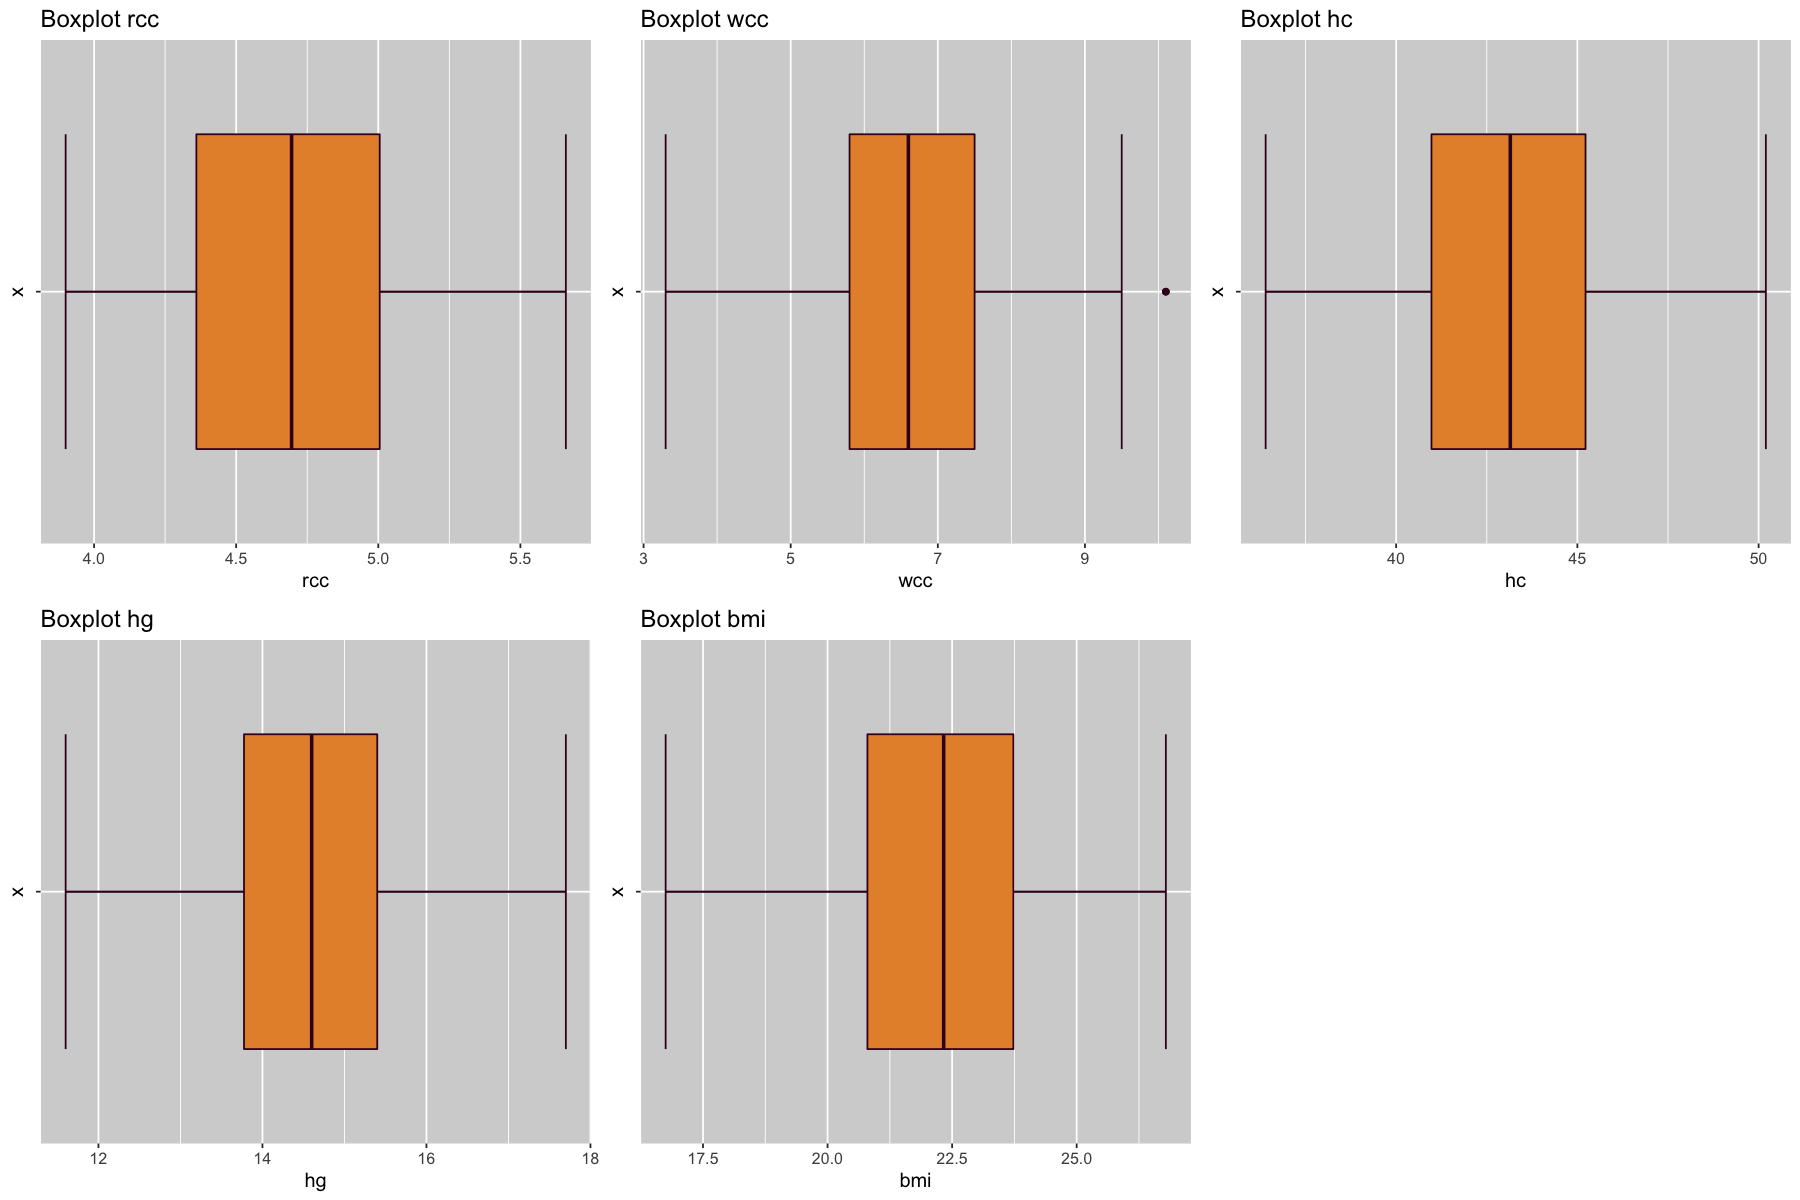

In [9]:
box_plots = list()
var_data = colnames(data_ais_numericas)

for (variable in var_data) {
  box_plot = ggplot(data_ais_numericas, aes(x = '', y = !!sym(variable))) +
    stat_boxplot(geom = 'errorbar', color = '#3c0023', na.rm = TRUE) +
    geom_boxplot(fill = '#e69138', color = '#3c0023', na.rm = TRUE) +
    coord_flip() +
    labs(title = paste('Boxplot', variable), y = variable) +
    theme(panel.background = element_rect(fill = 'lightgray'),
        panel.grid.major = element_line(color = 'white'),
        panel.grid.minor = element_line(color = 'white')) +
    theme(text = element_text(size = 12))
  box_plots[[variable]] = box_plot
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10 
)
grid.arrange(grobs = box_plots, ncol = 3, widths = rep(2, 3))

Por suerte, las métricas siguen una **distribución normal**, tanto en el barplot como en el boxplot. Solo destacamos la variable **wcc**, con la presencia de un outlier.

Aún así, hemos de tener cuidado con **rcc**, ya que a priori parece que su normal está sesgada a la izquierda. Vamos a ver con un qq plot si podemso concluir que es normal

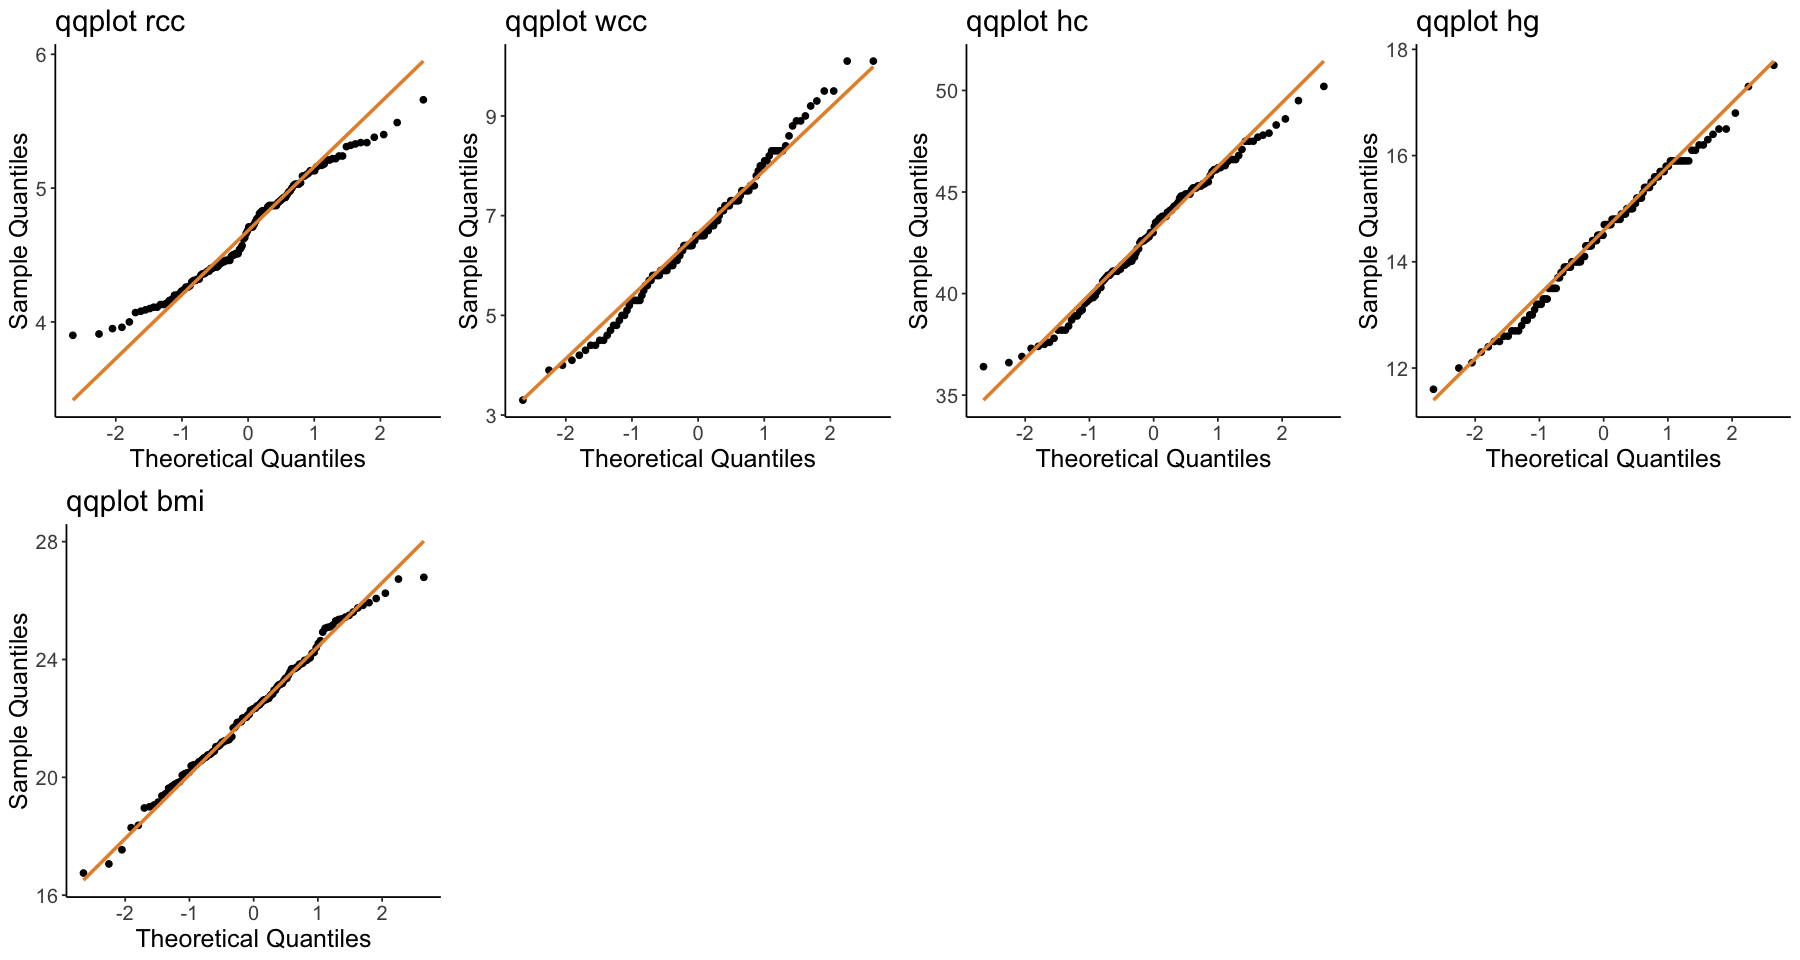

In [10]:
options(
  repr.plot.width = 15,  
  repr.plot.height = 8  
)
qq_plots = list()
var_data = colnames(data_ais_numericas)

for (i in seq_along(var_data)) {
  variable = var_data[i]
  qq_plot = ggplot(data_ais_numericas[!is.na(data_ais_numericas[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#e69138', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

Por el **qqplot**, podemos afrimar que **rcc** esta al límite de considerarse una normal. Simplemente debemos tenerlo en cuenta si la utilizamos, para asegurarnos que no sea un sesgo a la hora de, por ejemplo, comprovar el supuesto de normalidad. 

El resto se ve claramente que siguen una distribución normal

Insistiendo en la idea de **bmi**, vamos a explorar dicha variable, ya que es la úncia de la cual se tiene un poco de idea, sumado al hecho de que podemos comporvar que sus valores sean coherentes (al ser deportistas, se supone que estan dentro de un rango saludable).

Aún así, el bmi depende mucho del deporte que se practique. Para este dataset, consideramos que mas o menos el esfuerzo físico esta presente en la totalidad de los deportes.

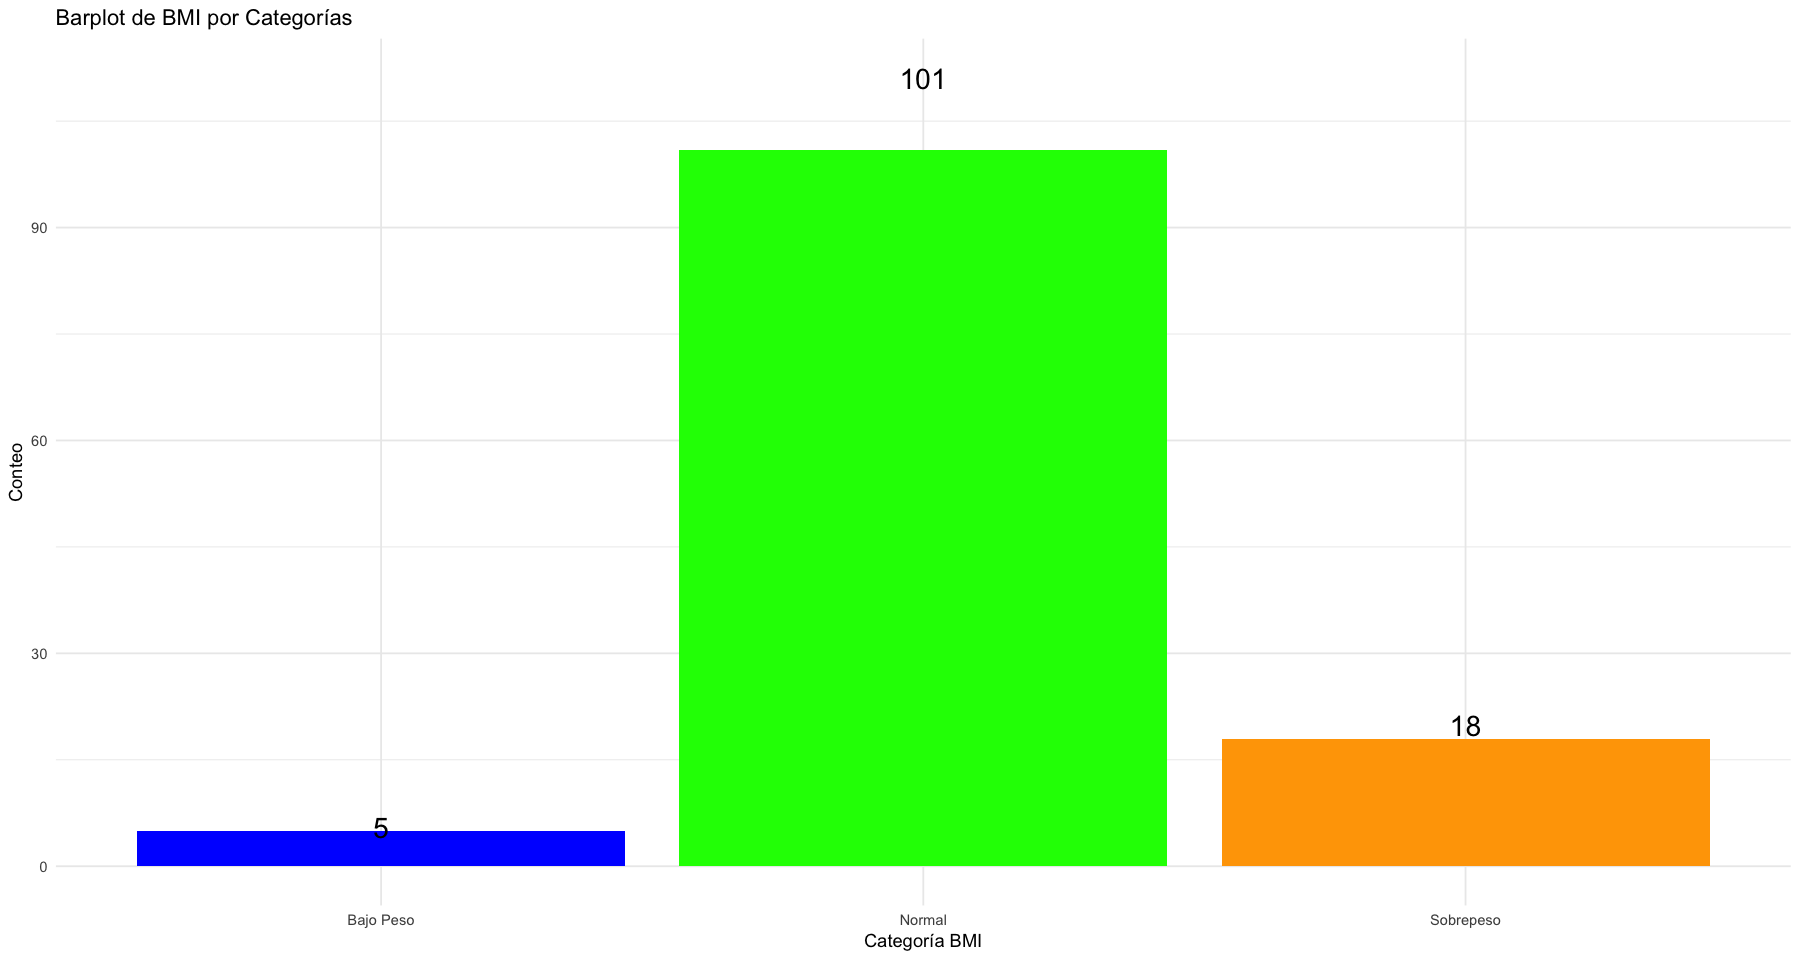

In [11]:

rangos_bmi <- c("Bajo Peso", "Normal", "Sobrepeso", "Obesidad")

data_ais$categoria_bmi <- cut(data_ais$bmi,
                               breaks = c(-Inf, 18.5, 24.9, 29.9, Inf),
                               labels = rangos_bmi)

ggplot(data_ais, aes(x = categoria_bmi, fill = categoria_bmi)) +
  geom_bar(stat = "count", show.legend = FALSE) +
  geom_text(stat = "count", aes(label = ..count..),
            position = position_stack(vjust = 1.1), size = 6) +
  scale_fill_manual(values = c("blue", "green", "orange", "red")) +
  theme_minimal() +
  labs(title = "Barplot de BMI por Categorías",
       x = "Categoría BMI",
       y = "Conteo",
       fill = "Categoría BMI")


Como podemos ver, tenemos presentes 18 individuos con, supuestamente, sobrepeso. Vamos a analizarlos en detalle para asegurarnos que no sea un sesgo en nuestros datos.

In [12]:
sobrepeso_data <- data_ais[data_ais$categoria_bmi == "Sobrepeso", ]
print(sobrepeso_data)

   rownames  rcc  wcc   hc   hg   bmi sex  sport categoria_bmi
11       11 4.71  5.3 41.4 14.0 25.75   f B_Ball     Sobrepeso
14       14 4.26  6.2 41.0 13.9 25.44   f    Row     Sobrepeso
39       62 4.23  8.1 38.2 12.7 25.17   f   Swim     Sobrepeso
56       90 4.00  4.2 36.6 12.0 25.36   f Tennis     Sobrepeso
70      108 4.75  8.6 45.5 15.2 25.11   m   Swim     Sobrepeso
72      110 4.87  4.8 44.9 15.4 26.25   m   Swim     Sobrepeso
75      113 4.32  4.3 41.6 14.0 26.73   m   Swim     Sobrepeso
77      115 5.04  7.1 44.0 14.8 25.84   m    Row     Sobrepeso
80      118 4.78  9.3 43.0 14.7 25.09   m    Row     Sobrepeso
82      120 5.22  8.4 47.5 16.2 25.31   m    Row     Sobrepeso
84      122 5.40  6.8 49.5 17.3 26.07   m    Row     Sobrepeso
85      123 4.92  5.4 46.2 15.8 25.50   m    Row     Sobrepeso
87      125 5.09 10.1 44.9 14.8 26.79   m    Row     Sobrepeso
88      126 4.83  5.0 43.8 15.1 25.61   m    Row     Sobrepeso
89      127 5.22  6.0 46.6 15.7 25.06   m    Row     So

Tal y como podemos ver, superan el bmi "normal" por muy poco. Nuevamente insisto en la idea de que es natural que se supere un poco dicho índice, ya que depende de muchos otras métricas que no tenemos. También se ha de tener en cuenta otras condiciones que influyen en dicho índice, como la alimentación del deportista, el momento de la temporada en la que se han recolectado los datos...

Por lo que cconcluimos que dichos índices no suponen un sesgo en los datos y los aceptamos

### <font color='#3d59c6'>  1.3.2 Variables categóricas </font>

In [13]:
data_ais_cat = data_ais %>%
  select_if(is.factor)
head(data_ais_cat)

sex,sport,categoria_bmi
f,B_Ball,Normal
f,B_Ball,Normal
f,B_Ball,Normal
f,B_Ball,Normal
f,B_Ball,Normal
f,B_Ball,Normal


In [14]:
col_ais_cat = c('sex','sport')
null_counts = colSums(is.na(data_ais_cat[, col_ais_cat]))
print(data.frame(Nulos = null_counts))

      Nulos
sex       0
sport     0


In [15]:
num_categorias = sapply(data_ais_cat, function(x) nlevels(x))
print(num_categorias)

          sex         sport categoria_bmi 
            2             5             4 


Por lo que hace a las variables categóricas, podemos ver como no tenemos todo el dataset al completo (a priori). Esto se debe a que se nos dice que hay un total de 9 deportes, y en el dataset solo teneoms 5 presentes.

Sacando este hecho, las variables categóricas parecen estar en orden (sin nulos). Aún así, vamos a observarlos con más detalle.

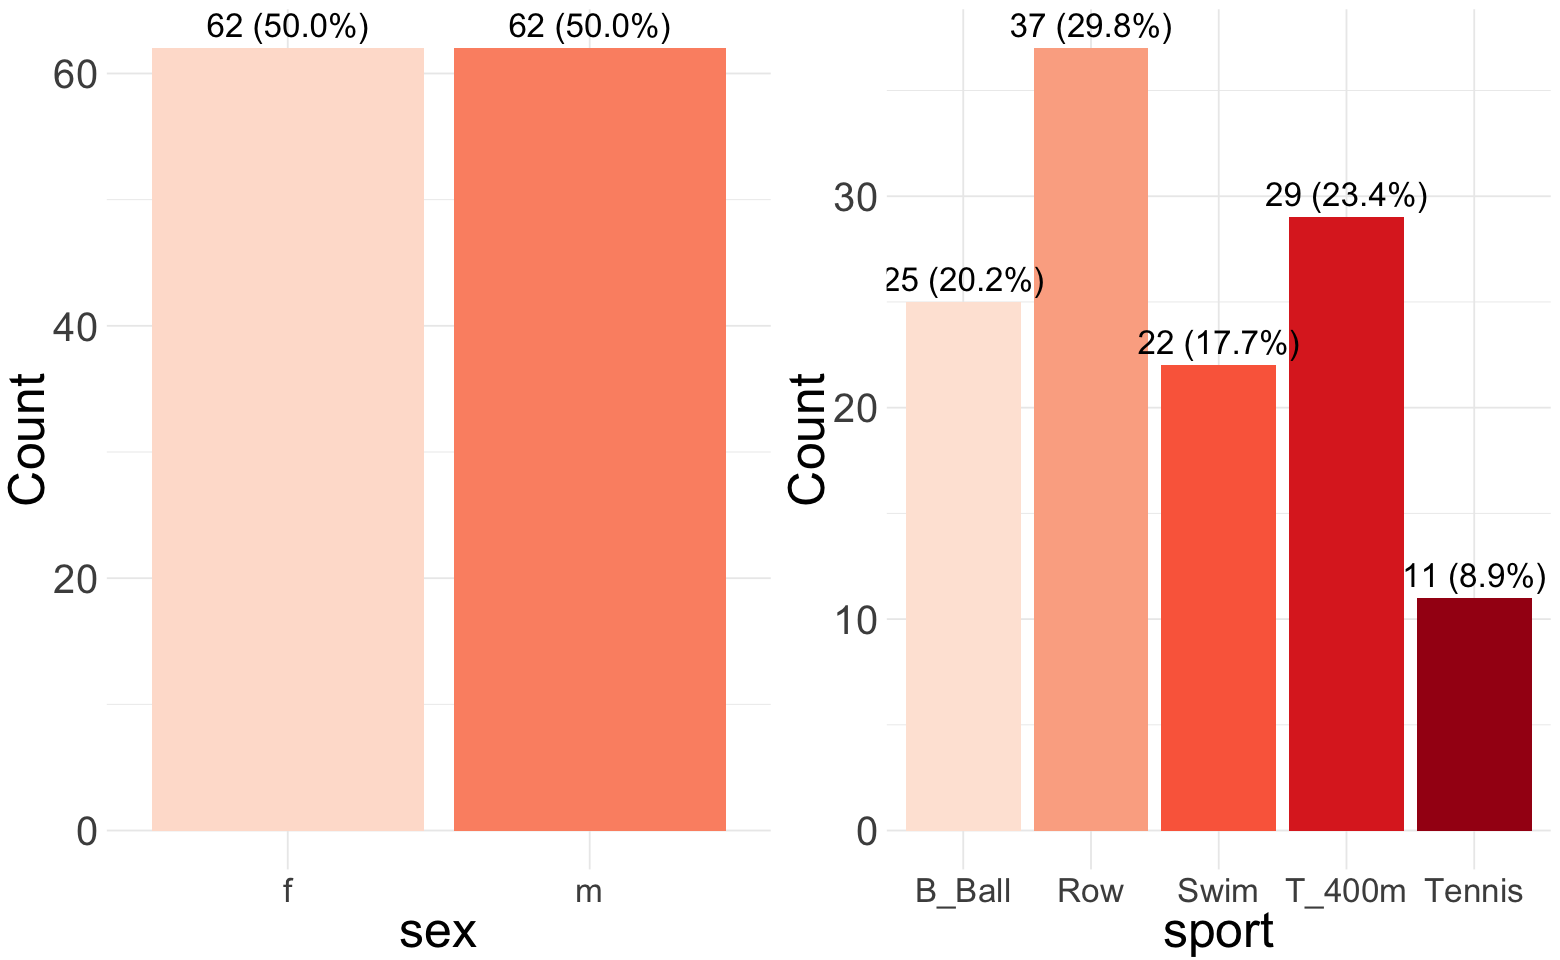

In [16]:

options(
  repr.plot.width = 13,  
  repr.plot.height = 8 
)
bar_plots = list()
var_data_cat_list = data_ais_cat[col_ais_cat]
var_data_cat = lapply(var_data_cat_list, list)

for (variable in names(var_data_cat)) {
  bar_plot = ggplot(data_ais_cat, aes(x = !!sym(variable), fill = as.factor(!!sym(variable)))) +
    geom_bar(stat = 'count', position = 'dodge') +
    scale_fill_brewer(palette = 'Reds') + 
    labs( x = variable, y = 'Count') +
    theme_minimal() +
    theme(legend.position = 'none', text = element_text(size = 30),axis.text.x = element_text(size = 20)) +
    geom_text(
      stat = 'count',
      aes(label = sprintf('%d (%.1f%%)', stat(count), stat(count) / sum(stat(count)) * 100)),
      position = position_dodge(0.9),
    vjust = -0.5,
    size=7
    )
  
  bar_plots[[variable]] = bar_plot
}

grid.arrange(grobs = bar_plots, ncol = 2, widths = rep(1, 2))

Viendo el gráfico, podemos ver como, por lo que concierne al sexo, tenemos el dataset **equilibrado**, lo que son buenas noticias para sacar conclusiones en los análisis posteriores.

Sin embargo, por lo que hace a los deportes no hemos tenido mucha suerte. Podemos ver un claro **desbalance** entre categorias. Aún así, excluiendo Tennis, podemos considerar que el volumen de datos no es del todo insuficiente, y que los análisis no se veran condicionados por la falta de datos de cada categoría. 

## <font color='#3d59c6'>  1.4. ANÁLISIS MATRIZ COVARIANZAS </font>

In [17]:
round(cov(data_ais_numericas), 3)

,rcc,wcc,hc,hg,bmi
rcc,0.168,0.101,1.143,0.429,0.173
wcc,0.101,1.920,0.835,0.281,0.256
hc,1.143,0.835,9.379,3.519,1.401
hg,0.429,0.281,3.519,1.442,0.618
bmi,0.173,0.256,1.401,0.618,4.448


Debido a la gran diferencia en unidades de medida de cada variable, dicha matriz de covarianza no nos ayuda a observar si existe alguna relación entre variables

In [18]:
round(cor(data_ais_numericas), 3)

,rcc,wcc,hc,hg,bmi
rcc,1.000,0.178,0.912,0.871,0.201
wcc,0.178,1.000,0.197,0.169,0.087
hc,0.912,0.197,1.000,0.957,0.217
hg,0.871,0.169,0.957,1.000,0.244
bmi,0.201,0.087,0.217,0.244,1.000


Sin embargo, con la matriz de correlación vemos claramente com hay variables muy relacionadas como hc con rcc (hermatocritos con glóbulos rojos) y incluso también con hg (hemoglobina).

Esto tiene sentido ya que tanto los glóbulos rojos como el hematocrito son medidas relacionadas con la cantidad de células sanguíneas en la sangre y, por lo tanto, es común observar una correlación positiva entre ambas.

También vemos como los hematocritos y la hemoglobina estan relacionados. Esto se debe a que tanto el hematocrito como la hemoglobina están relacionados con la capacidad de la sangre para transportar oxígeno y nutrientes a los tejidos del cuerpo.

El resto de variables no presentan una relación significativa.

Vamos a ver dicha matriz gráficamente, para ver su relación visualmente.

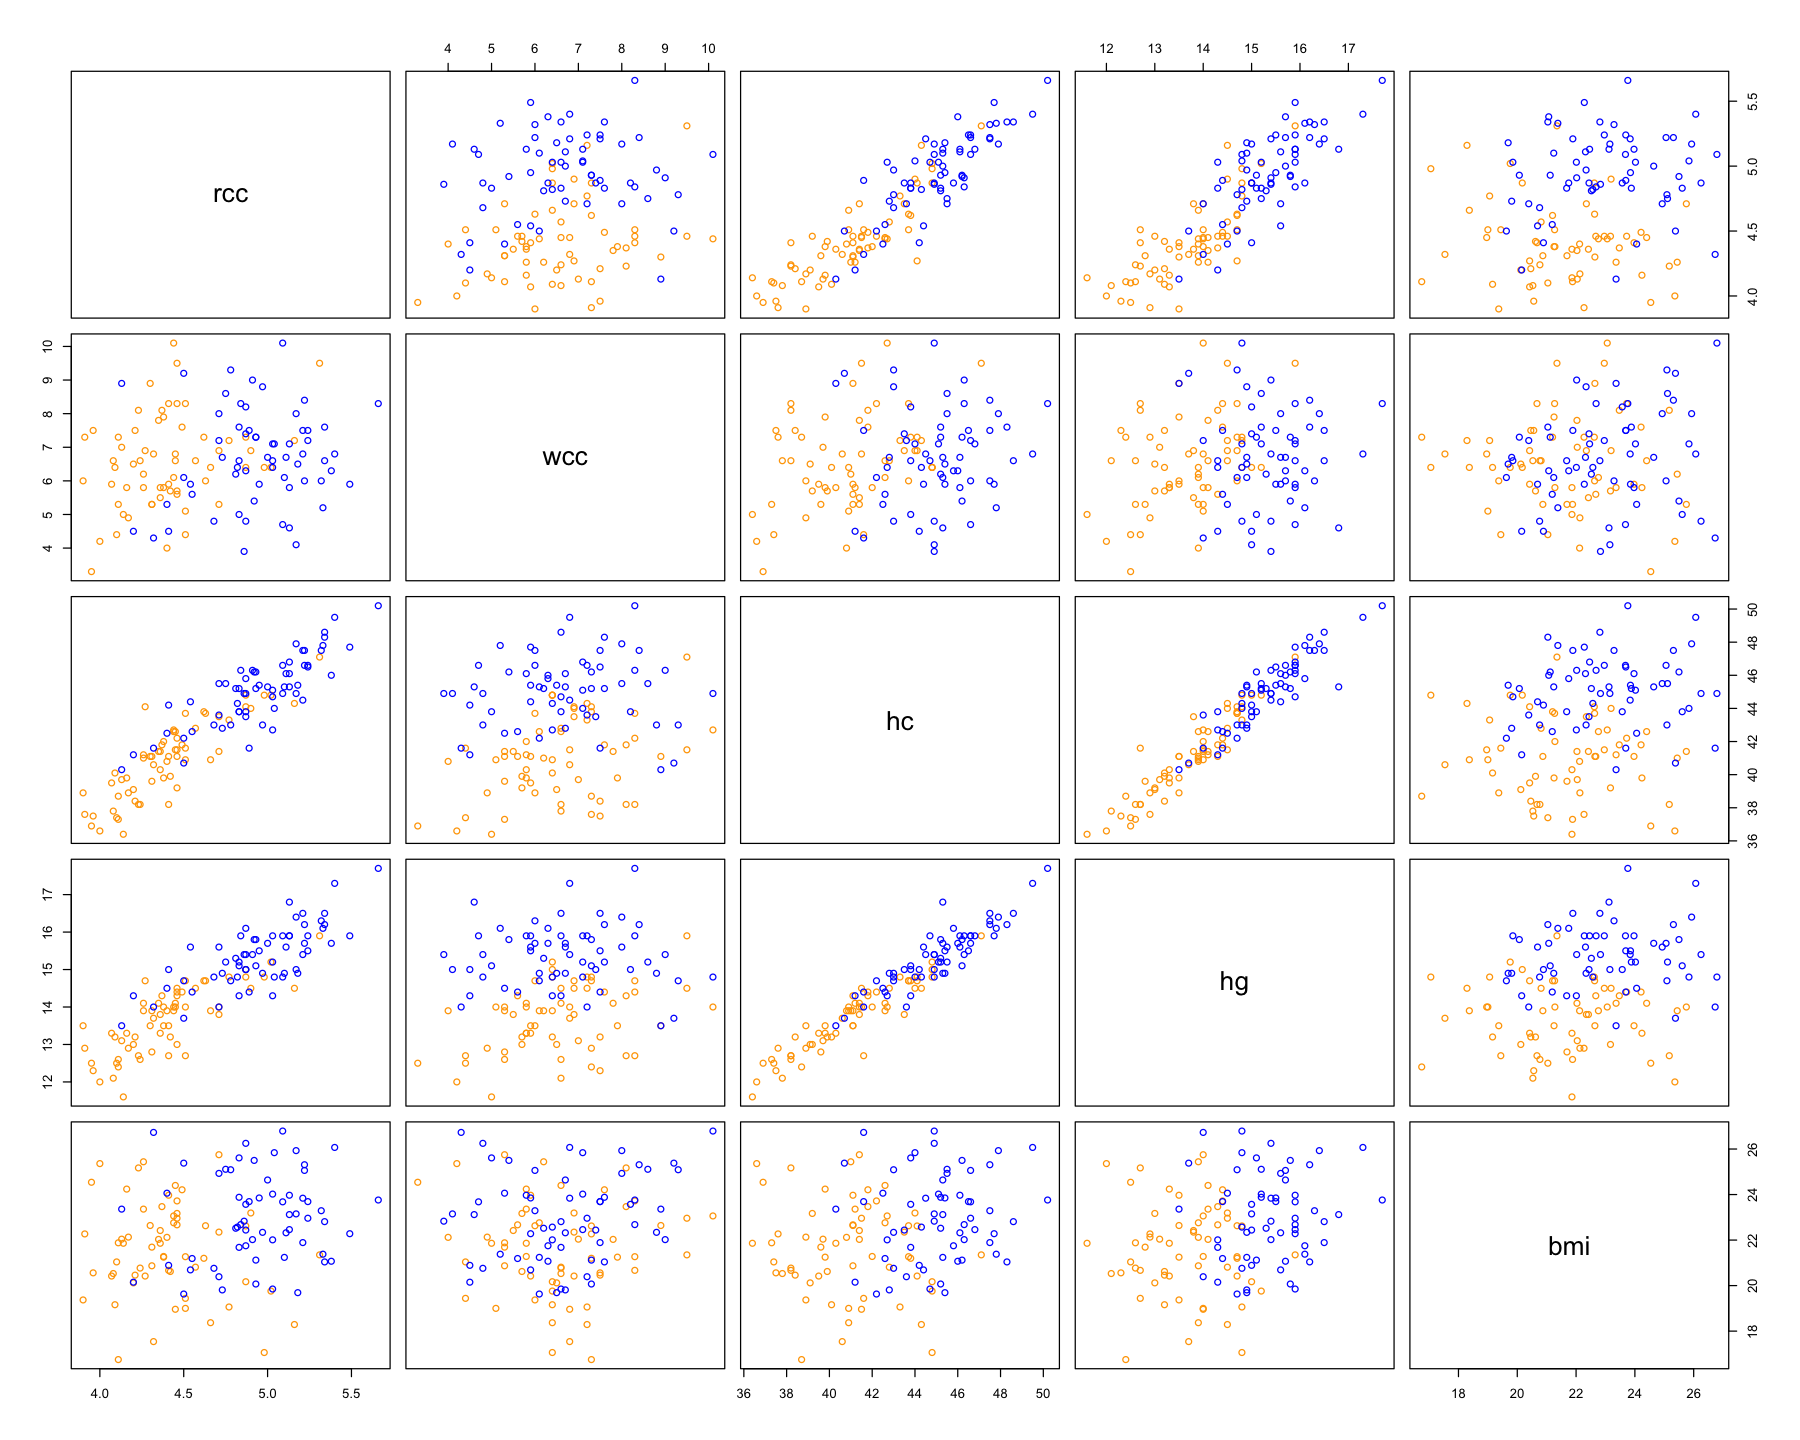

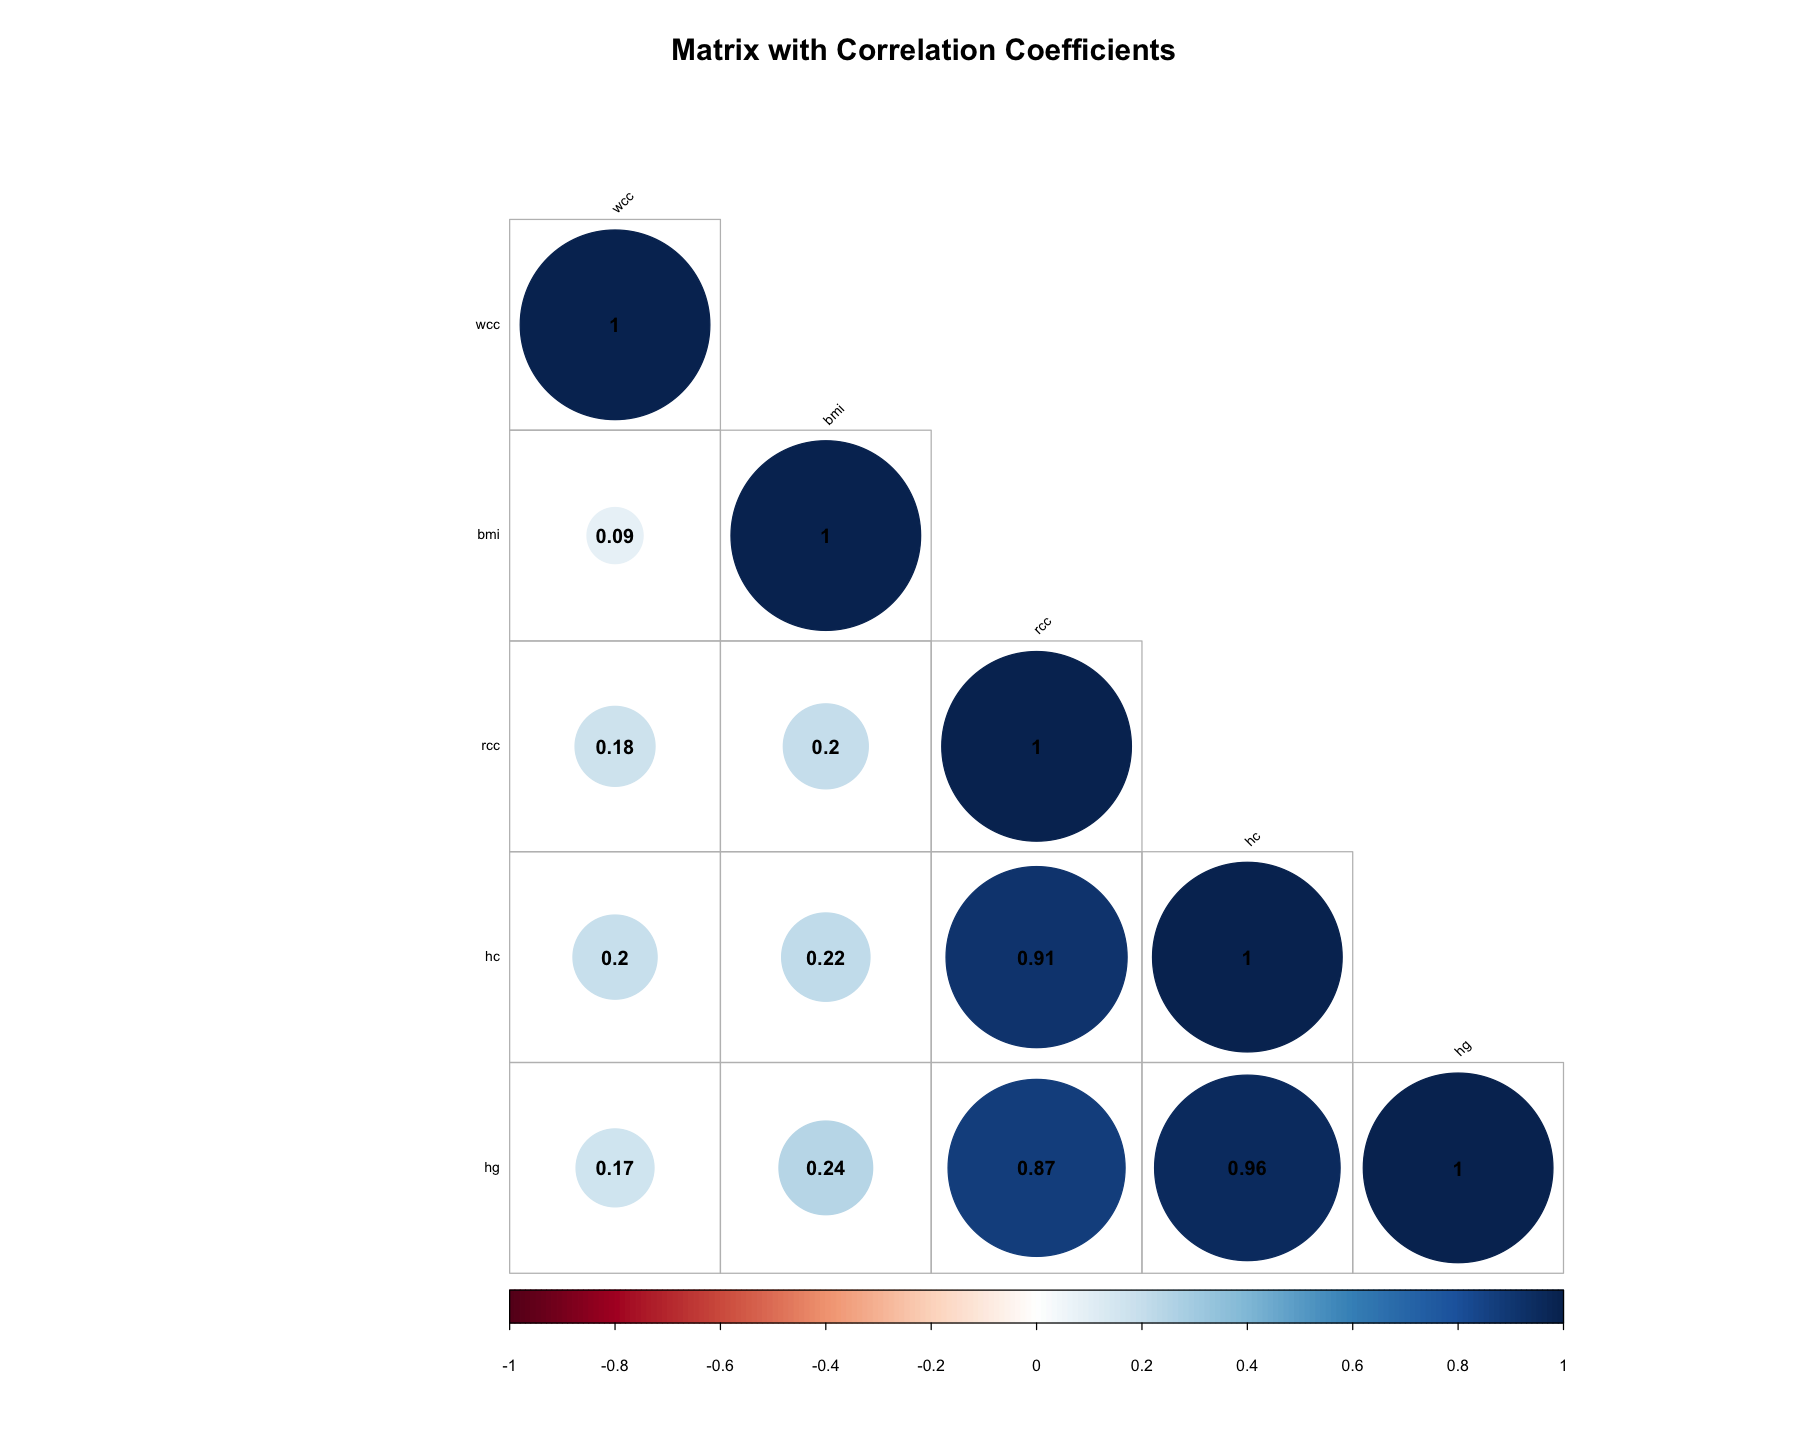

In [32]:

par(bg = "white")
colores_factor <- ifelse(data_ais_cat$sex == "m", "blue", "orange")

# Scatterplot matrix using base R
pairs(data_ais_numericas, col = colores_factor)

legend("top", legend = levels(data_ais_cat$sex),
       fill = c("blue", "orange"), title = "Sexo", cex = 1.2)

# Correlation matrix using corrplot
cor_matrix <- cor(data_ais_numericas)


# Customize corrplot appearance
corrplot(cor_matrix,
         method = "circle",
         type = "lower",
         order = "hclust",
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",
         number.cex = 1,
         tl.cex = 0.7)

# Add a title
title("Matrix with Correlation Coefficients", cex.main = 1.5)



A parte de lo anteriormente mencionado, podemos entrever como hay ciertas variables que nos pueden servir para saber si se trata de un hombre o una mujer, como por ejemplo la relación:

- rcc - hc
- rcc - hg
- hg - hc

El resto estan al límite de poder hacer una clasificación tan evidente.

# <font color='#3d59c6'>  2. REALIZAR TEST ANOVA </font>

## <font color='#3d59c6'>  2.1 COMPROVACIÓN DE SUPUESTOS  </font>

### <font color='#3d59c6'>  2.1.1 Normalidad  </font>

In [ ]:

#Normalidad
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
categorias = c('f', 'm')
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data_ais, sex == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)


   Variable Cat   Shapiro PValor
W       rcc   f 0.9527609  0.018
W1      rcc   m 0.9796056  0.390
W2      wcc   f 0.9889641  0.852
W3      wcc   m 0.9871224  0.762
W4       hc   f 0.9822609  0.509
W5       hc   m 0.9917297  0.953
W6       hg   f 0.9853917  0.670
W7       hg   m 0.9881680  0.815
W8      bmi   f 0.9891767  0.862
W9      bmi   m 0.9737279  0.204


Tal y como hemos destacado al principio del ejercico, la variable rcc no presentaba una distribución estrictamente normal en sus datos. Con este test podemos afirmar que no es así, ya que el **p-value es inferior a 0.05**, lo que implica **rechazar** la hipotesis nula (sigue una distribución normal)

Las demás variables si que presentan una normal

Destacar que este análisis es para el factor **sex**

In [ ]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
categorias = c('B_Ball', 'Row', 'Swim', 'T_400m', 'Tennis')
resultados = data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data_ais, sport == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

    Variable    Cat   Shapiro PValor
W        rcc B_Ball 0.9668856  0.568
W1       rcc    Row 0.9659142  0.309
W2       rcc   Swim 0.9164542  0.064
W3       rcc T_400m 0.9755527  0.717
W4       rcc Tennis 0.9602871  0.775
W5       wcc B_Ball 0.9627397  0.472
W6       wcc    Row 0.9608115  0.214
W7       wcc   Swim 0.9621063  0.533
W8       wcc T_400m 0.9536983  0.228
W9       wcc Tennis 0.9146806  0.277
W10       hc B_Ball 0.9677765  0.589
W11       hc    Row 0.9884984  0.962
W12       hc   Swim 0.9381614  0.181
W13       hc T_400m 0.9613755  0.355
W14       hc Tennis 0.9783319  0.956
W15       hg B_Ball 0.9583881  0.383
W16       hg    Row 0.9782721  0.671
W17       hg   Swim 0.9457531  0.260
W18       hg T_400m 0.9780738  0.787
W19       hg Tennis 0.9399817  0.520
W20      bmi B_Ball 0.9694488  0.631
W21      bmi    Row 0.9622123  0.237
W22      bmi   Swim 0.9827718  0.954
W23      bmi T_400m 0.9578281  0.290
W24      bmi Tennis 0.9655063  0.838


Para el factor **sport**, vemos un comportamiento similar al anterior factor, pero ahora rcc con Swim esta al límite de cumplir normalidad.

Esto implica que hemos de tener cuidado con rcc para describir sex, pero se podria usar para descrivir sport

### <font color='#3d59c6'>  2.1.1 Homocedasticidad  </font>

In [ ]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ sex, data = data_ais)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                      Variable Estadistico    PValor
Bartlett's K-squared       rcc   0.1046790 0.7462853
Bartlett's K-squared1      wcc   0.1205474 0.7284416
Bartlett's K-squared2       hc   1.0434306 0.3070249
Bartlett's K-squared3       hg   0.4223403 0.5157716
Bartlett's K-squared4      bmi   0.2849915 0.5934481


Los p-value son más grandes que 0.05, por lo que aceptamos al hipótesis nula (los errores tienen una varianza constante)

In [34]:
variables = c('rcc', 'wcc', 'hc', 'hg', 'bmi')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ sport, data = data_ais)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                      Variable Estadistico    PValor
Bartlett's K-squared       rcc   2.7209300 0.6055571
Bartlett's K-squared1      wcc   0.9647336 0.9150955
Bartlett's K-squared2       hc   2.4492440 0.6537469
Bartlett's K-squared3       hg   5.1199980 0.2752051
Bartlett's K-squared4      bmi   4.3053131 0.3662603


Para sport tenemos el mismo caso que sex, todos complen con la homocedasticidad.

Una vez visto que se cumplen los supuestos (teniendo en cuenta el caso especial de rcc), vamos con los test ANOVA

### <font color='#3d59c6'>  2.2 One-Way Anova  </font>

Las variables seleccionadas son:
- wcc
- bmi

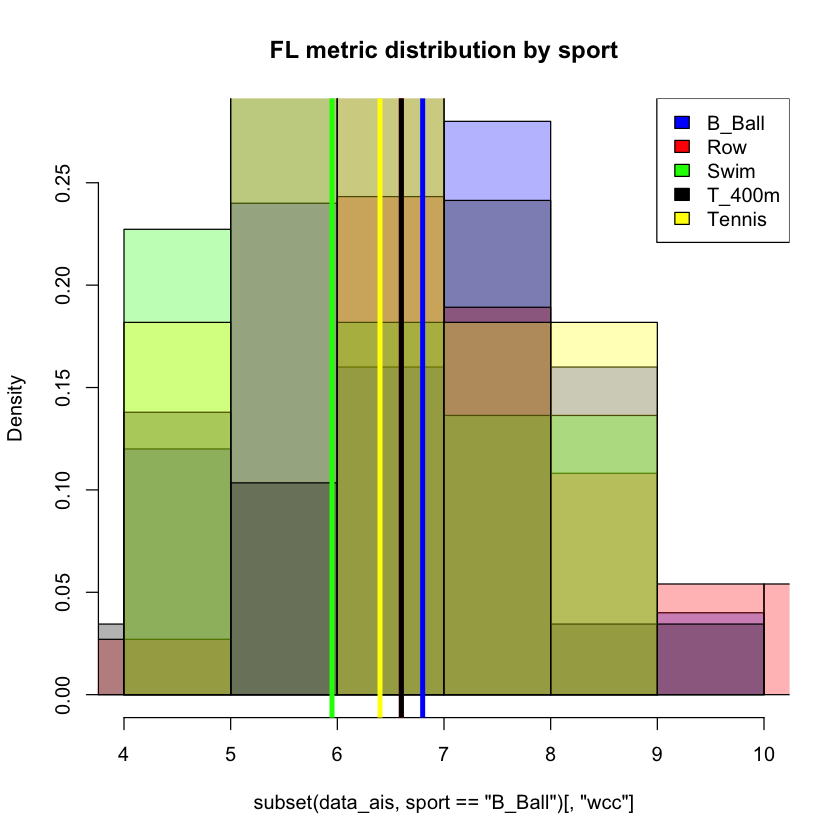

In [37]:
par(bg = "white")

options(
  repr.plot.width = 7,  
  repr.plot.height = 7  
)

hist(subset(data_ais,sport=='B_Ball')[,'wcc'],
    col = rgb(0,0,1,0.3),
    main = 'FL metric distribution by sport',
    freq = F)
hist(subset(data_ais,sport=='Row')[,'wcc'],
    col = rgb(1,0,0,0.3),
    add = T,
    freq = F)
hist(subset(data_ais,sport=='Swim')[,'wcc'],
    col = rgb(0,1,0,0.3),
    add = T,
    freq = F)
hist(subset(data_ais,sport=='T_400m')[,'wcc'],
    col = rgb(0,0,0,0.3),
    add = T,
    freq = F)
hist(subset(data_ais,sport=='Tennis')[,'wcc'],
    col = rgb(1,1,0,0.3),
    add = T,
    freq = F)


abline(v = median(subset(data_ais, sport=='B_Ball')[,'wcc']), col = '#0000FF', lwd = 4)
abline(v = median(subset(data_ais, sport=='Row')[,'wcc']), col = '#FF0000', lwd = 4)
abline(v = median(subset(data_ais, sport=='Swim')[,'wcc']), col = '#00FF00', lwd = 4)
abline(v = median(subset(data_ais, sport=='T_400m')[,'wcc']), col = '#000000', lwd = 4)
abline(v = median(subset(data_ais, sport=='Tennis')[,'wcc']), col = '#FFFF00', lwd = 4)
legend(x = "topright", legend = c('B_Ball', 'Row', 'Swim', 'T_400m', 'Tennis'), fill = c('#0000FF', '#FF0000','#00FF00','#000000','#FFFF00'))


Debido a que tenemos muchas categorias dentro del factor sport, este gráfico nos resulta complicado de entender. Para ello, vamos a usar los gráficos de violín, que nos ayudarán más a interpretar los resultados (por ello no hemos hecho este gráfico para bmi, y hemos hecho directamente el de violín)

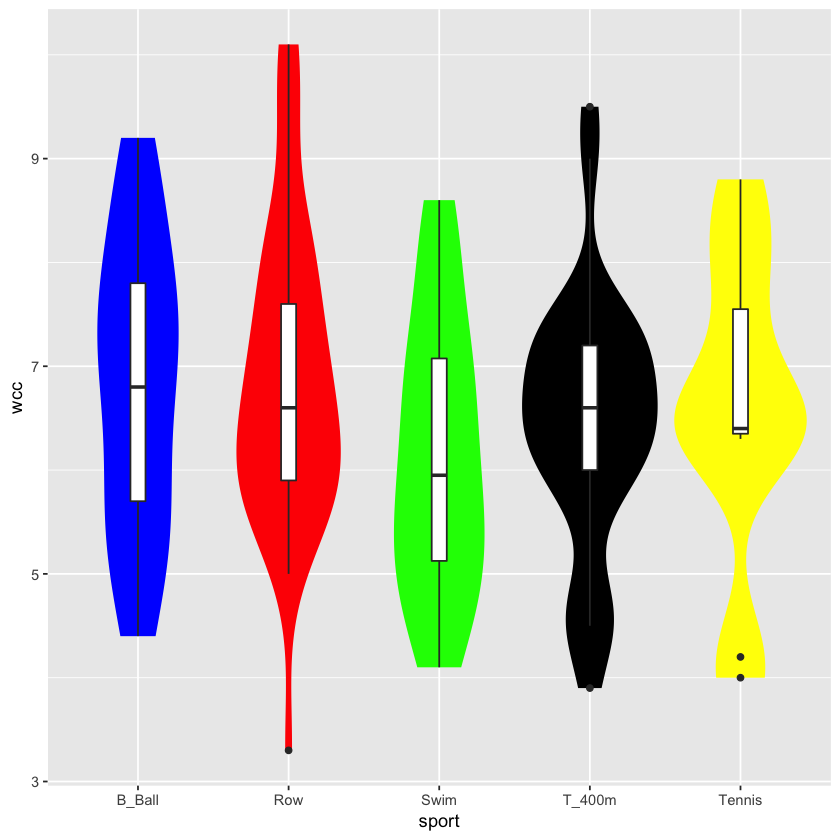

In [43]:
ggplot(data_ais, aes(sport, wcc)) +
  geom_violin(color = NA,aes(fill = factor(sport))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('B_Ball' = '#0000FF', 'Row' = '#FF0000', 'Swim' = '#00FF00', 'T_400m' = '#000000', 'Tennis' = '#FFFF00'))

Con este gráfico, podemos ver como no hay diferencia significativa entre grupos (cuando hablamos de wcc). Aún así, con el test anova() lo acabaremos de confirmar

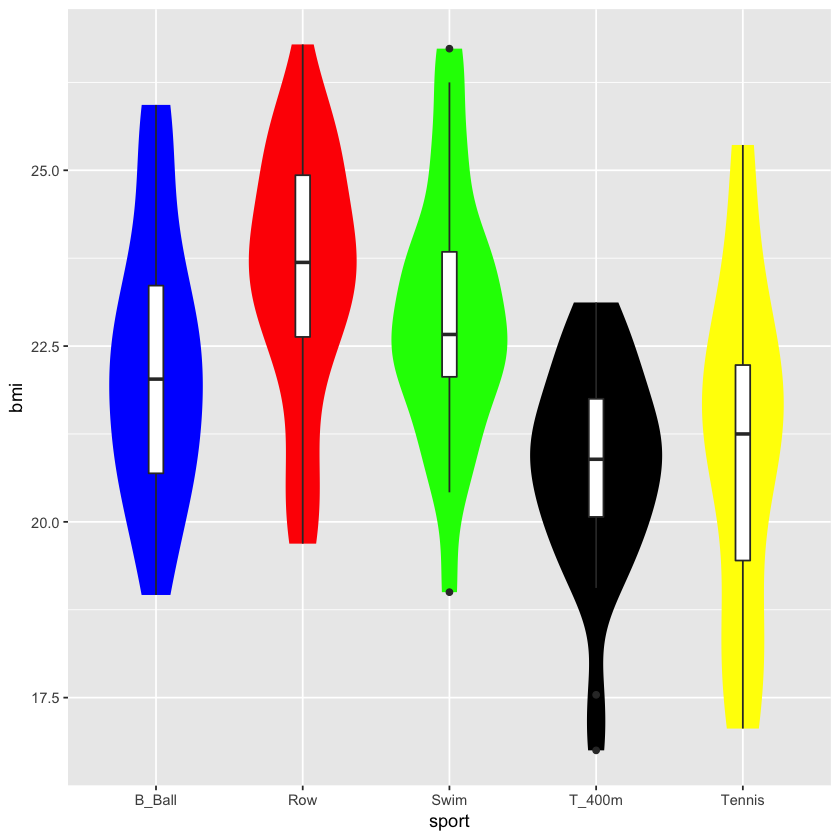

: 

In [44]:
ggplot(data_ais, aes(sport, bmi)) +
  geom_violin(color = NA,aes(fill = factor(sport))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('B_Ball' = '#0000FF', 'Row' = '#FF0000', 'Swim' = '#00FF00', 'T_400m' = '#000000', 'Tennis' = '#FFFF00'))

Si embargo, para bmi si que parece haber una diferencia significativa, debido a los saltos que hay entre categorias del factor sport, sobretodo si nos fijamos en las medianas de cada violín. Aún así, vamos a confirmarlo con el test anova()

In [ ]:
anova = aov(wcc ~ sport, data = data_ais)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)
sport         4   9.45   2.363    1.24  0.298
Residuals   119 226.73   1.905               

In [ ]:
anova = aov(bmi ~ sport, data = data_ais)
summary(anova)

             Df Sum Sq Mean Sq F value   Pr(>F)    
sport         4  148.1   37.03   11.04 1.19e-07 ***
Residuals   119  398.9    3.35                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Efectivamente, vemos como con wcc el p-value es superior a 0.05, lo que implica que no hay diferencia significativa entre grupos. Sin embargo, con bmi, el p-value es inferior a 0.05, por lo que rechazamos la hipotesis nula y efectivamente hay diferencia significativa entre grupos

### <font color='#3d59c6'>  2.2 Two-Way Anova  </font>

Para el two-way Anova, hemos escogido dos variables correlacionadas:
- hc
- hg



In [ ]:
data_ais_two = data_ais[, c('sex','sport','hc', 'hg')]
head(data_ais_two)

sex,sport,hc,hg
f,B_Ball,37.5,12.3
f,B_Ball,38.2,12.7
f,B_Ball,36.4,11.6
f,B_Ball,37.3,12.6
f,B_Ball,41.5,14.0
f,B_Ball,37.4,12.5


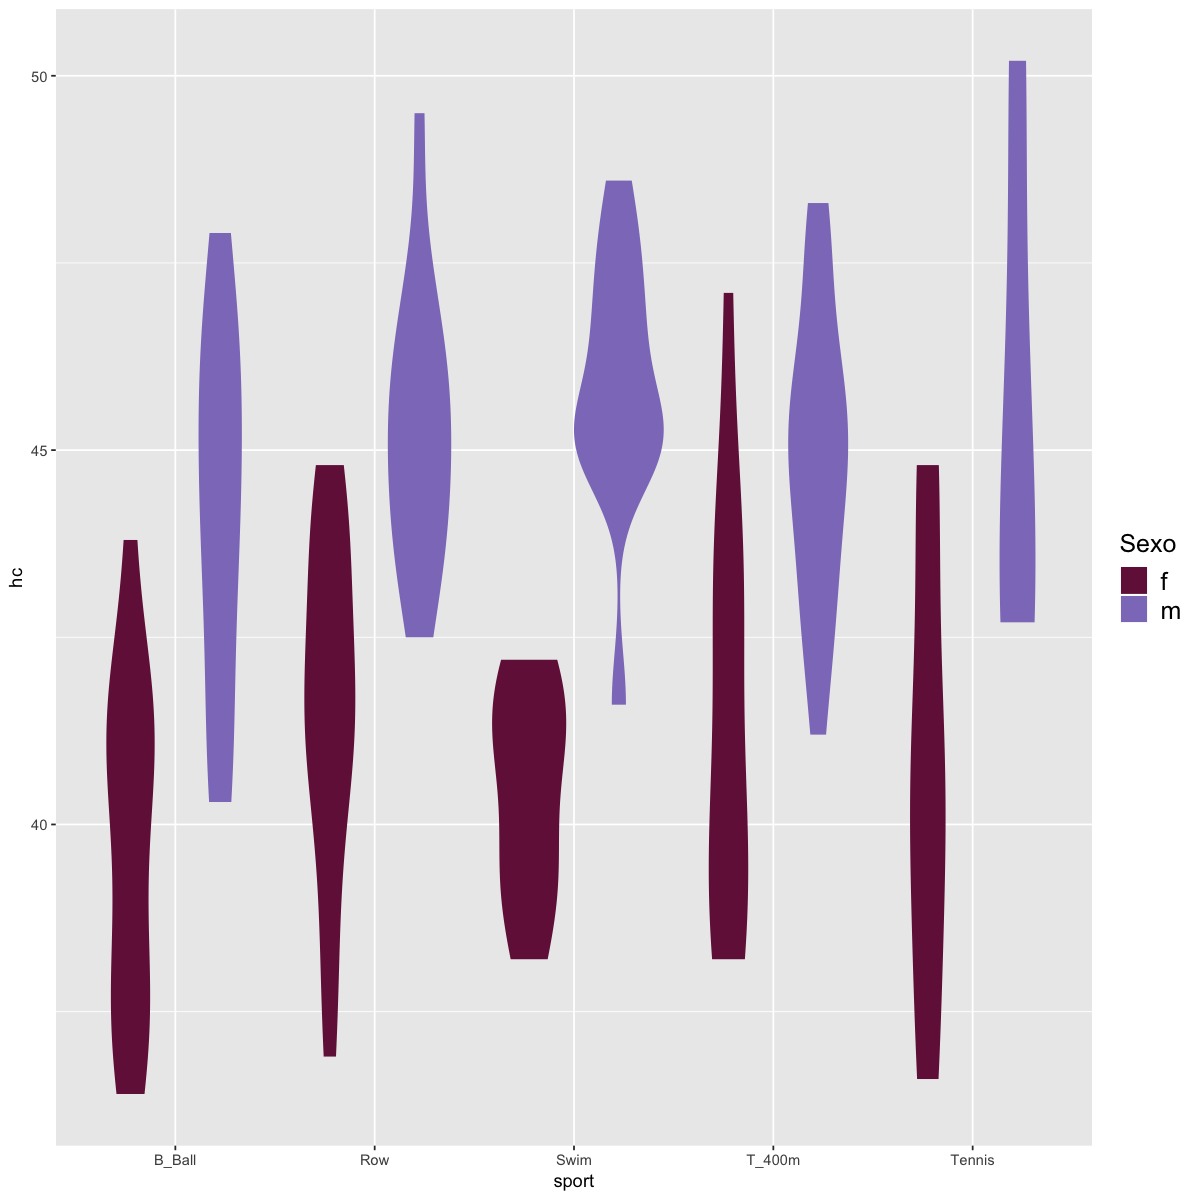

In [ ]:
options(
  repr.plot.width = 10,  
  repr.plot.height = 10  
)
ggplot(data_ais_two, aes(sport, hc, fill = factor(sex))) +
  geom_violin(color = NA) +
  theme(legend.position = 'right'
        ,legend.text = element_text(size = 15)
        ,legend.title = element_text(size = 15)) +
  scale_fill_manual(values = c('f' = '#741b47', 'm' = '#8e7cc3')) +
  labs(fill = 'Sexo')

Gracias a los gráficos de violín, podemos intuir que entre hombre y mujer si que hay una diferencia significativa dada la métrica hc, pero que entre grupos de deporte, se comportan de manera similar (ende, no hay diferencia significativa).

Como siempre, vamos a contrastar dichos gráficos con números:

In [ ]:
anova = aov(hc ~ sport * sex, data = data_ais)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)    
sport         4   53.7    13.4   2.697 0.0343 *  
sex           1  517.1   517.1 103.869 <2e-16 ***
sport:sex     4   15.2     3.8   0.765 0.5502    
Residuals   114  567.6     5.0                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Aquí podemos ver como ambos factores tienen un p-value inferior a 0.05 (sacando la combinación de ambos factores). Esto quiere decir que el deporte influye (no muy significativamente, ya que el p-value es muy cercano a 0.05) a la métrica hc (hematocritos).

Por otro lado, el sexo tiene una gran influencia en esta métrica (hematocritos), debido a su p-value (mucho más pequeño que 0.05).

Las estrellas al lado del p-value ya nos lo indican

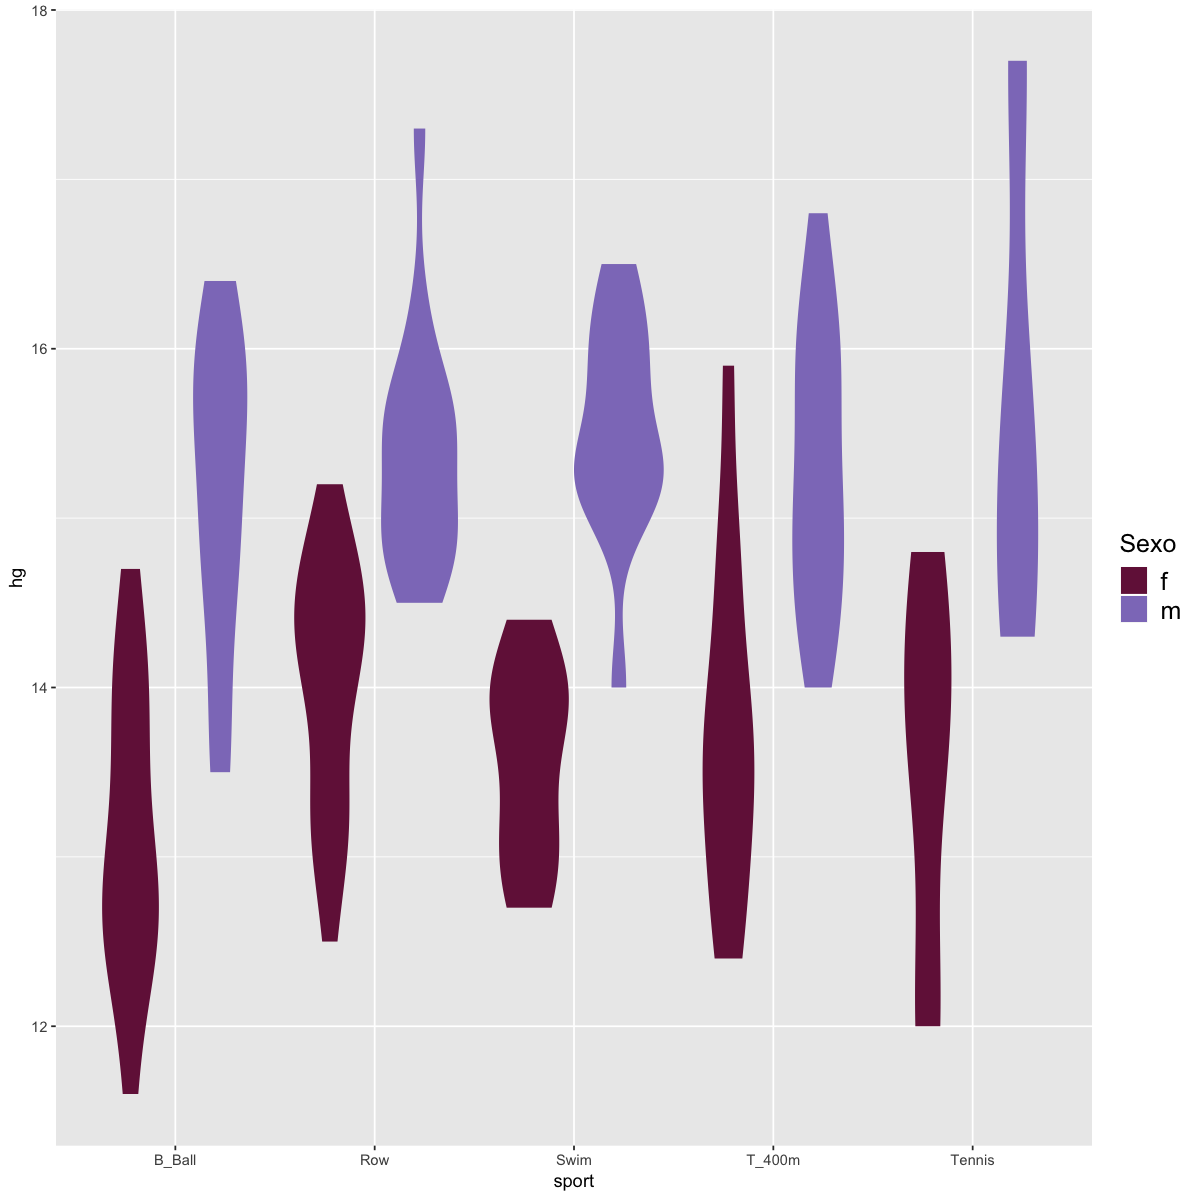

In [ ]:
options(
  repr.plot.width = 10,  
  repr.plot.height = 10  
)
ggplot(data_ais_two, aes(sport, hg, fill = factor(sex))) +
  geom_violin(color = NA) +
  theme(legend.position = 'right'
        ,legend.text = element_text(size = 15)
        ,legend.title = element_text(size = 15)) +
  scale_fill_manual(values = c('f' = '#741b47', 'm' = '#8e7cc3')) +
  labs(fill = 'Sexo')

In [ ]:
anova = aov(hg ~ sport * sex, data = data_ais)
summary(anova)

             Df Sum Sq Mean Sq F value Pr(>F)    
sport         4   7.20    1.80   2.529 0.0444 *  
sex           1  86.52   86.52 121.641 <2e-16 ***
sport:sex     4   2.62    0.65   0.920 0.4550    
Residuals   114  81.09    0.71                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Debido a la alta correlación entre hg y hc, podemos intuir que los resultados seran muy cercanos.

Tal y como podemos observar, extraemos las mismas conclusiones que con los hematocritos, en donde la combinación de factores no influye en la hemoblobina, pero por separado si (teniendo en uenta que el deporte influye muy poco debido a su p-value, muy cercano al 0.05).


In [ ]:
resultados_anova_conjunto = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
resultados_anova_sp = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
resultados_anova_sex = data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
variables = c('hc', 'hg')
for (variable in variables) {
  formula = as.formula(paste(variable, '~ sport * sex'))
  anova_result = aov(formula, data = data_ais)
  
  # Extraer F value y p-value
  f_value3 = summary(anova_result)[[1]][['F value']][3]
  p_value3 = summary(anova_result)[[1]][['Pr(>F)']][3]
  resultados_anova_conjunto = rbind(resultados_anova_conjunto, data.frame(Variable = variable, F_Value = f_value3, P_Value = p_value3))
  f_value1 = summary(anova_result)[[1]][['F value']][1]
  p_value1 = summary(anova_result)[[1]][['Pr(>F)']][1]
  resultados_anova_sp = rbind(resultados_anova_sp, data.frame(Variable = variable, F_Value = f_value1, P_Value = p_value1))
  f_value2 = summary(anova_result)[[1]][['F value']][2]
  p_value2 = summary(anova_result)[[1]][['Pr(>F)']][2]
  resultados_anova_sex = rbind(resultados_anova_sex, data.frame(Variable = variable, F_Value = f_value2, P_Value = p_value2))
}

# Muestra los resultados de ANOVA
print('Resultados impacto de Deporte & Género conjuntamente sobre las variables')
print(resultados_anova_conjunto)
print('Resultados impacto de Deporte sobre las variables')
print(resultados_anova_sp)
print('Resultados impacto de Género sobre las variables')
print(resultados_anova_sex)

[1] "Resultados impacto de Deporte & Género conjuntamente sobre las variables"
  Variable   F_Value   P_Value
1       hc 0.7648780 0.5502423
2       hg 0.9199158 0.4549883
[1] "Resultados impacto de Deporte sobre las variables"
  Variable  F_Value    P_Value
1       hc 2.696782 0.03425760
2       hg 2.529049 0.04436928
[1] "Resultados impacto de Género sobre las variables"
  Variable  F_Value      P_Value
1       hc 103.8688 9.904415e-18
2       hg 121.6406 1.091431e-19


Si hacemos un resultado conjunto con ambas variables, podemos confirmar lo anteriormente mencionado.

Vemos como la combinación de factores no influye (p-value superior a 0.05), pero por separado sí, teniendo en cuenta que **SEX** influye mucho mas sobre las dos métricas en comparación con **SPORT**



# <font color='#3d59c6'>  3 Conclusiones  </font>

Por último, me gustaria reflexionar sobre los resultados obtenidos con los test ANOVA realizados:

- **One-way ANOVA:**

Este estudio nos deja ver el efecto de un factor (en este caso el sport) sobre una variable dependiente continua (en este caso las células blancas en la sangre y el índice de masa corporal).

Para la primera métrica, concluimos que el factor no tiene efecto sobre ella. Bien pensado, tiene sentido. Todos los deportes de los cuales tenemos información tienen un desgaste físico importante. Hacer deporte en general está demostrado que tiene efectos positivos en la producción y fluidez de la sangre, independientemente del deporte que se practique. Es la actividad física que nos brinda dichos beneficios.

Por ello, podemos afirmar que, entre los individuos, la actividad física ha hecho que esos niveles de células blancas en la sangre sea muy similar entre ellos.

Por otro lado, podemos ver como los atletas de 400m lisos y los Tenistas tienen un índice de masa corporal más bajo que los demás deportes, por lo que podemos afirmar que dicho factor síq eu influye en la métrica. Este hecho tiene sentido, ya que los dos deportes en particular requieren de más actividad cardiovascular que fuerza, lo que científicamente esta relacionado con pesos más bajos (en comparación a deportistas de las demás disciplinas presentes en el dataset). A más cardio se hace (seguido de una buena alimentación y descanso, lo que se sobreentiende dado que son atletas) más calorias se queman, lo que resulta en un índice más bajo.

- **Two-way Anova:**

En este test, hemos podido observar como la combinación de los factores no tiene influyencia sobre los hematocritos y la hemoglobina, pero por separado si.

De hecho, el deporte tiene una influencia muy leve, mientras que el sexo tiene un impacto significativo. Esto se debe a que los hombres tienden a tener un mayor volumen de sangre que las mujeres. Las hormonas sexuales, como la testosterona en hombres y el estrógeno en mujeres, también desempeñan un papel en la regulación de la producción de glóbulos rojos. Por último, la menstruación también afecta en dichas medidas.